# Import Libraries

In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy.stats import norm


# One dimensional plot distribution: 

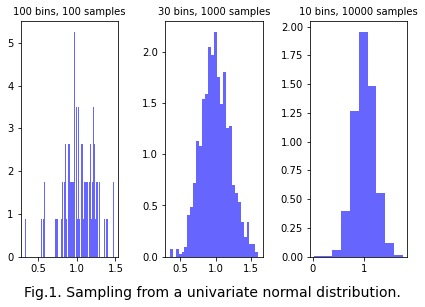

In [9]:

# 1 Dimensional
def normal_dist_1D(mean , sd, Num_samples, Num_bins):
    # defining x, the normal/ gaussian distribution
    x= np.random.normal(loc= mean, scale= sd, size= Num_samples)
    # Plot the distribution
    plt.hist(x, bins= Num_bins, density=True, alpha=0.6, color='b', histtype ='bar')
    plt.plot()

mean= 1      # mean: average of distribution
sd= 0.2      # sd: standard deviation of distribution

# Plot results
fig= plt.figure()

plt.subplot(131)
# bin: 100, sample: 100
plt.title(f'{100} bins, {100} samples', fontsize=10)
normal_dist_1D(mean, sd, Num_samples= 100, Num_bins= 100)

plt.subplot(132)
# bin: 30, sample: 1K
plt.title(f'{30} bins, {1000} samples', fontsize=10)
normal_dist_1D(mean, sd, Num_samples= 1000, Num_bins= 30)

plt.subplot(133)
# bin: 10, sample: 10K
plt.title(f'{10} bins, {10000} samples', fontsize=10)
normal_dist_1D(mean, sd, Num_samples= 10000, Num_bins= 10)

plt.suptitle("Fig.1. Sampling from a univariate normal distribution.", 
             y= -0.005, fontsize=14)
plt.tight_layout()

plt.show()

#save the plots as a figure
fig.savefig('Univariate plot.jpg', bbox_inches='tight', dpi=150)

# Two dimensional distribution:

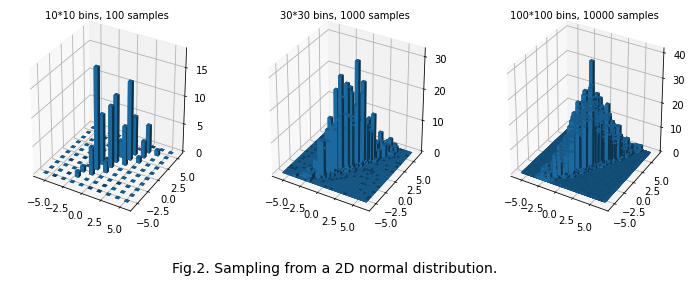

In [8]:
# 2 Dimensional
def normal_dist_2D(mean , sd, Num_samples, Num_bins):
    # defining x,y: the normal gaussian distribution
    x, y= np.random.multivariate_normal(mean, sd, size= Num_samples).T  # it is transposed to fit into the histogram2d function
    hist, xedges, yedges = np.histogram2d(x, y, bins= Num_bins, 
                                          range=[[-6, 6], [-6, 6]])
    # plot the result
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel() # ravel(): returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    return xpos, ypos, zpos, dx, dy, dz

mean= [0.5, -0.2]       # mean: average of distribution
sd= [[2,3] , [3,5]]     # sd: standard deviation of distribution
fig= plt.figure(figsize=plt.figaspect(0.33))

# bin: 10*10, sample: 100 
xpos, ypos, zpos, dx, dy, dz= normal_dist_2D(mean, sd, Num_samples= 100, Num_bins= 10)
ax = fig.add_subplot(1, 3, 1, projection='3d')
plt.title(f'{10}*{10} bins, {100} samples', fontsize=10)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# bin: 30*30, sample: 1K
xpos, ypos, zpos, dx, dy, dz= normal_dist_2D(mean, sd, Num_samples= 1000, Num_bins= 30)
ax = fig.add_subplot(1, 3, 2, projection='3d')
plt.title(f'{30}*{30} bins, {1000} samples', fontsize=10)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# bin: 100*100, sample: 10K
xpos, ypos, zpos, dx, dy, dz= normal_dist_2D(mean, sd, Num_samples= 10000, Num_bins= 100)
ax = fig.add_subplot(1, 3, 3, projection='3d')
plt.title(f'{100}*{100} bins, {10000} samples', fontsize=10)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.suptitle("Fig.2. Sampling from a 2D normal distribution.", 
             y= -0.005, fontsize=14)
plt.show()

#save the plots as a figure
fig.savefig('Multivariate plot.jpg', bbox_inches='tight', dpi=150)
